<a href="https://colab.research.google.com/github/A7mednage71/juice/blob/main/PatternFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data analysis and visulazation**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv('/content/Cocktail Juice Quality_Training Dataset (1).csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
data.shape

(1277, 10)

In [6]:
data.head()

,Fruit quality,fixed acidity,citric acid,Percentage of sweeteners,chlorides,Calories,density,pH,sulphates,quality
0,9.4,7.4,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,5
1,9.8,7.8,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,5
2,9.8,7.8,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,5
3,9.8,11.2,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,6
4,9.4,7.4,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fruit quality             1277 non-null   float64
 1   fixed acidity             1277 non-null   float64
 2   citric acid               1277 non-null   float64
 3   Percentage of sweeteners  1277 non-null   float64
 4   chlorides                 1277 non-null   float64
 5   Calories                  1277 non-null   float64
 6   density                   1277 non-null   float64
 7   pH                        1277 non-null   float64
 8   sulphates                 1277 non-null   float64
 9   quality                   1277 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 99.9 KB


 **Plot histograms of all features**


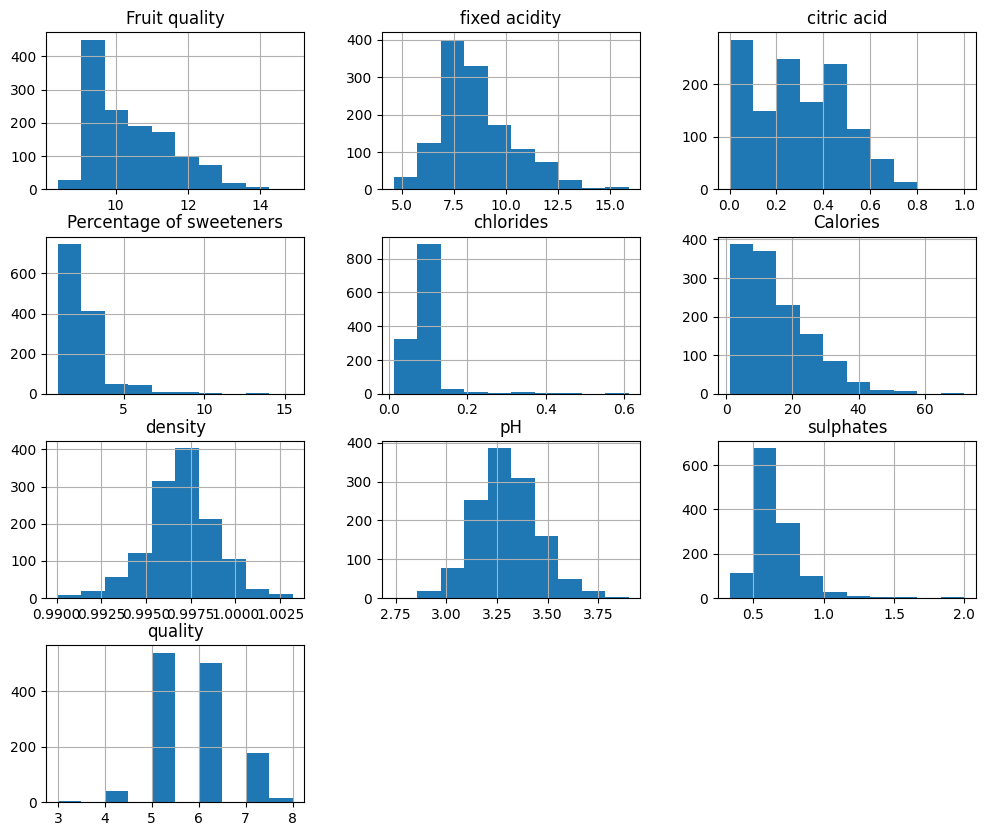

In [8]:
import matplotlib.pyplot as plt
data.hist(figsize=(12, 10))

# Save the plot as image
plt.savefig('histogram.jpg')

**Data Correlation**

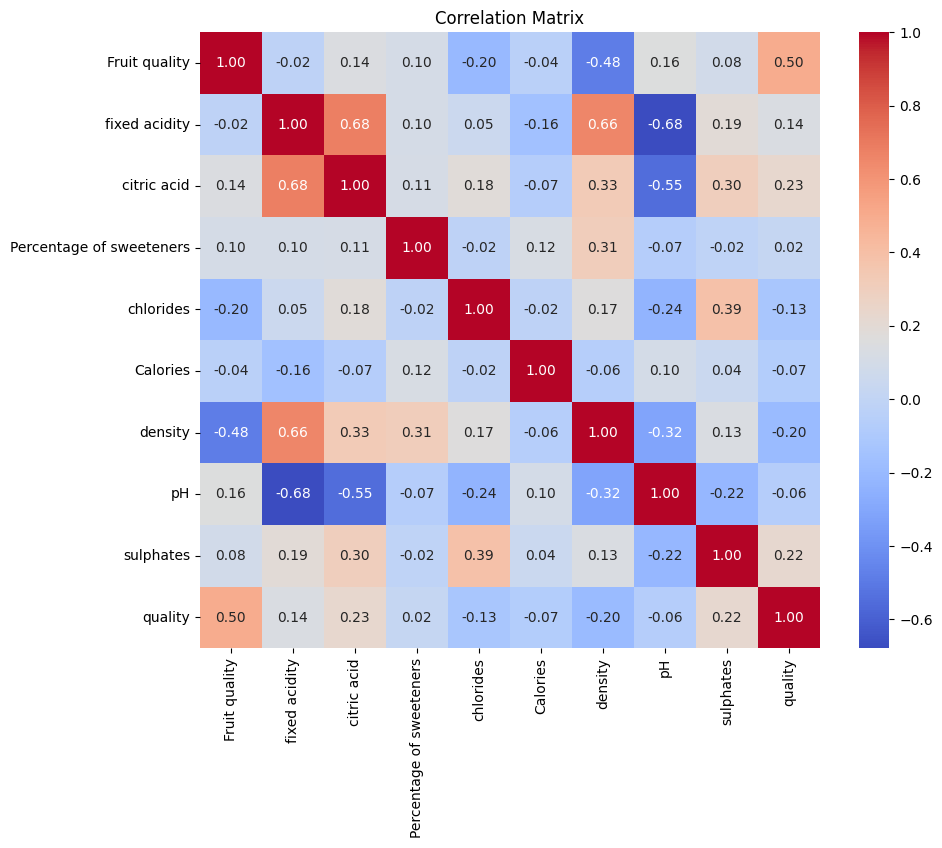

In [9]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**correlation of features with the target variable "quality"**

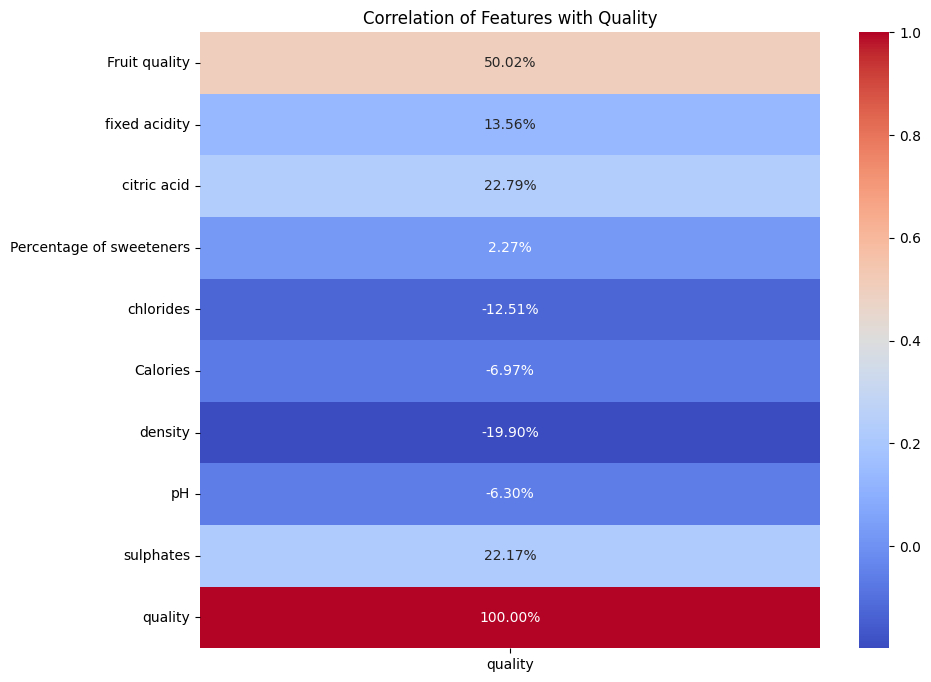

In [10]:
import seaborn as sns

corr_with_quality = corr_matrix['quality']
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_quality.to_frame(), annot=True, cmap='coolwarm', fmt=".2%")
plt.title('Correlation of Features with Quality')
plt.show()


**Boxplot of Features to know outliers**

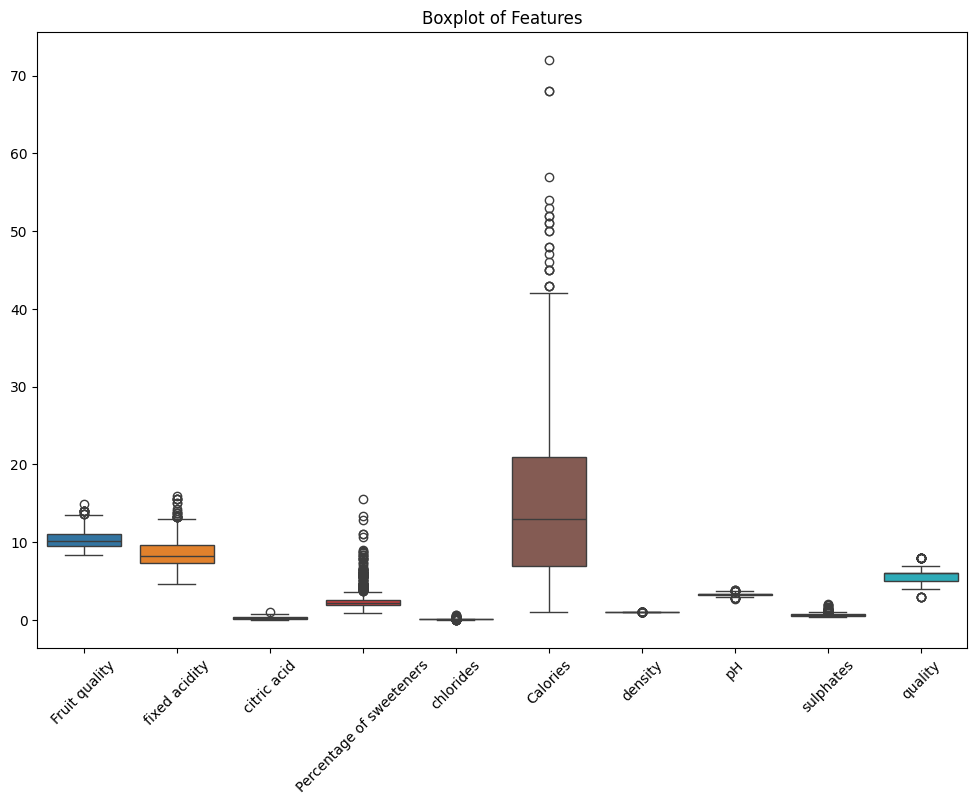

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

**Feature Engineering - Drop PH and Sweetteners**

In [12]:
data = data.drop(columns=['Percentage of sweeteners', 'pH'])

In [13]:
data

,Fruit quality,fixed acidity,citric acid,chlorides,Calories,density,sulphates,quality
0,9.4,7.4,0.00,0.076,11.0,0.99780,0.56,5
1,9.8,7.8,0.00,0.098,25.0,0.99680,0.68,5
2,9.8,7.8,0.04,0.092,15.0,0.99700,0.65,5
3,9.8,11.2,0.56,0.075,17.0,0.99800,0.58,6
4,9.4,7.4,0.00,0.076,11.0,0.99780,0.56,5
...,...,...,...,...,...,...,...,...
1272,11.2,5.9,0.00,0.077,25.0,0.99385,0.53,5
1273,9.3,7.5,0.20,0.073,34.0,0.99494,0.43,5
1274,11.2,7.8,0.13,0.102,17.0,0.99440,0.53,6
1275,9.5,8.0,0.22,0.075,13.0,0.99688,0.54,6


**Data Processing**

In [14]:
#log transformation

features_to_log = ['Fruit quality','fixed acidity','chlorides','Calories' ]

log_transformed = np.log(data[features_to_log])
log_transformed.columns = [f'{col}_log' for col in log_transformed.columns]
data = pd.concat([data, log_transformed], axis=1)

data.head()

,Fruit quality,fixed acidity,citric acid,chlorides,Calories,density,sulphates,quality,Fruit quality_log,fixed acidity_log,chlorides_log,Calories_log
0,9.4,7.4,0.00,0.076,11.0,0.9978,0.56,5,2.240710,2.001480,-2.577022,2.397895
1,9.8,7.8,0.00,0.098,25.0,0.9968,0.68,5,2.282382,2.054124,-2.322788,3.218876
2,9.8,7.8,0.04,0.092,15.0,0.9970,0.65,5,2.282382,2.054124,-2.385967,2.708050
3,9.8,11.2,0.56,0.075,17.0,0.9980,0.58,6,2.282382,2.415914,-2.590267,2.833213
4,9.4,7.4,0.00,0.076,11.0,0.9978,0.56,5,2.240710,2.001480,-2.577022,2.397895


In [15]:
data.drop(['Fruit quality','fixed acidity','chlorides','Calories' ], axis=1, inplace=True)
data

,citric acid,density,sulphates,quality,Fruit quality_log,fixed acidity_log,chlorides_log,Calories_log
0,0.00,0.99780,0.56,5,2.240710,2.001480,-2.577022,2.397895
1,0.00,0.99680,0.68,5,2.282382,2.054124,-2.322788,3.218876
2,0.04,0.99700,0.65,5,2.282382,2.054124,-2.385967,2.708050
3,0.56,0.99800,0.58,6,2.282382,2.415914,-2.590267,2.833213
4,0.00,0.99780,0.56,5,2.240710,2.001480,-2.577022,2.397895
...,...,...,...,...,...,...,...,...
1272,0.00,0.99385,0.53,5,2.415914,1.774952,-2.563950,3.218876
1273,0.20,0.99494,0.43,5,2.230014,2.014903,-2.617296,3.526361
1274,0.13,0.99440,0.53,6,2.415914,2.054124,-2.282782,2.833213
1275,0.22,0.99688,0.54,6,2.251292,2.079442,-2.590267,2.564949


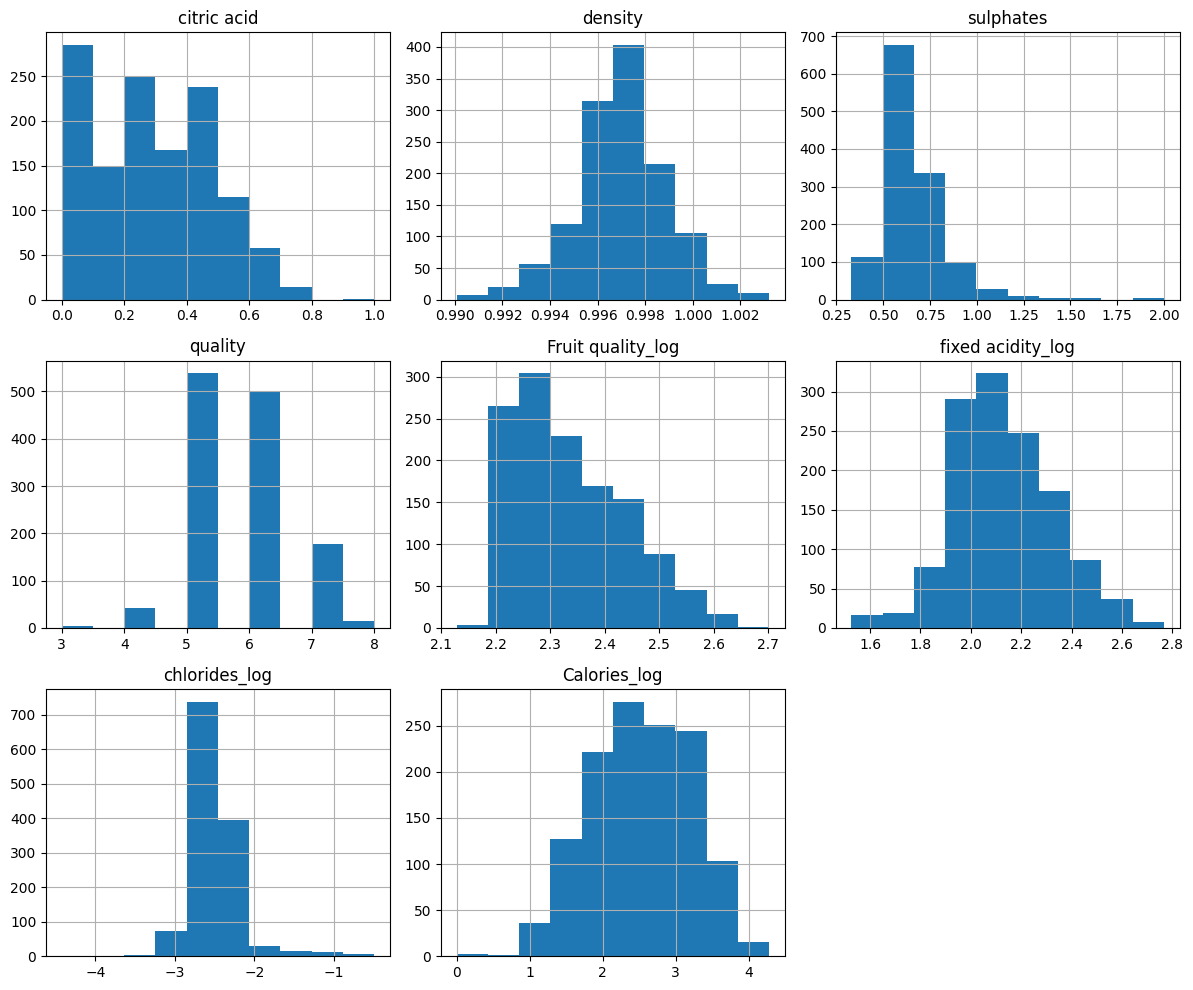

In [16]:
data.hist(figsize=(12, 10))
plt.tight_layout()   #padding
plt.show()

**Data Splitting**

In [17]:
X = data.drop('quality', axis=1)
Y = data['quality']

In [18]:
X.shape

(1277, 7)

In [19]:
X

,citric acid,density,sulphates,Fruit quality_log,fixed acidity_log,chlorides_log,Calories_log
0,0.00,0.99780,0.56,2.240710,2.001480,-2.577022,2.397895
1,0.00,0.99680,0.68,2.282382,2.054124,-2.322788,3.218876
2,0.04,0.99700,0.65,2.282382,2.054124,-2.385967,2.708050
3,0.56,0.99800,0.58,2.282382,2.415914,-2.590267,2.833213
4,0.00,0.99780,0.56,2.240710,2.001480,-2.577022,2.397895
...,...,...,...,...,...,...,...
1272,0.00,0.99385,0.53,2.415914,1.774952,-2.563950,3.218876
1273,0.20,0.99494,0.43,2.230014,2.014903,-2.617296,3.526361
1274,0.13,0.99440,0.53,2.415914,2.054124,-2.282782,2.833213
1275,0.22,0.99688,0.54,2.251292,2.079442,-2.590267,2.564949


In [20]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1272    5
1273    5
1274    6
1275    6
1276    4
Name: quality, Length: 1277, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

**Models**

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

linear_pred = linear_regressor.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_pred)

linear_mae = mean_absolute_error(y_test, linear_pred)

print("Linear Regression:")
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)

Linear Regression:
Mean Squared Error (MSE): 0.4322231246349775
Mean Absolute Error (MAE): 0.5331089881670369


In [23]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
dt_pred = dt_regressor.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)


dt_mae = mean_absolute_error(y_test, dt_pred)
print("\nDecision Tree:")
print("Mean Squared Error (MSE):", dt_mse)
print("Mean Absolute Error (MAE):", dt_mae)


Decision Tree:
Mean Squared Error (MSE): 0.609375
Mean Absolute Error (MAE): 0.46875


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Random Forest Regressor
rf_regressor = RandomForestRegressor()

# hyperparameters grid for Grid Search
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 10, 20]

}

# Initialize Grid Search Cross Validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform Grid Search CV on training data
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_rf_model = grid_search.best_estimator_

# Predict on the test data using the best model
rf_pred = best_rf_model.predict(X_test)

# evaluation metrics
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)


print("Random Forest Regression after Grid Search:")
print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)



Random Forest Regression after Grid Search:
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Mean Squared Error (MSE): 0.3568899556819256
Mean Absolute Error (MAE): 0.437148933531746


**# Predict on the new data using the best model**





In [25]:
new_data = {
    'citric acid': [0.04],
    'density': [0.99700],
    'sulphates': [0.65],
    'Fruit quality_log': [2.282382],
    'fixed acidity_log': [2.054124],
    'chlorides_log': [-2.385967],
    'Calories_log': [2.708050],
}

# Create DataFrame for new feature values

X_new = pd.DataFrame(new_data)
new_predictions = best_rf_model.predict(X_new)

print("Predicted values for new data:")
print(new_predictions.round())

Predicted values for new data:
[5.]


**SVM with Data Scalling**

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [27]:
from sklearn.svm import SVR

svm_regressor = SVR()

svm_regressor.fit(X_train, y_train)
svm_pred = svm_regressor.predict(X_test)

svm_mse = mean_squared_error(y_test, svm_pred)
svm_mae = mean_absolute_error(y_test, svm_pred)

print("Support Vector Machine (SVM):")
print("Mean Squared Error (MSE):", svm_mse)
print("Mean Absolute Error (MAE):", svm_mae)

Support Vector Machine (SVM):
Mean Squared Error (MSE): 0.40490185623854447
Mean Absolute Error (MAE): 0.48429912476133047


**Predict on the new data using the SVM model**

In [28]:
new_data = {
    'feature1': [-1.144938],
    'feature2': [-0.401297],
    'feature4': [-0.424896],
    'feature5': [0.411636],
    'feature6': [-1.051739],
    'feature7': [-0.994935],
    'feature8': [-0.190444],
}

# Create DataFrame for new feature values
X_new = pd.DataFrame(new_data)

predictions_new = svm_regressor.predict(X_new)

print("Predictions for new data:")
print(predictions_new.round())


Predictions for new data:
[5.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


**Save the trained model**

In [29]:
import joblib
joblib.dump(best_rf_model, 'random_forest_regressor_model.pkl')
loaded_model = joblib.load('random_forest_regressor_model.pkl')

**Test model with new values after loading the best model**

In [30]:
# Sample new feature values
new_data = {
    'citric acid': [0.04],
    'density': [0.99700],
    'sulphates': [0.65],
    'Fruit quality_log': [2.282382],
    'fixed acidity_log': [2.054124],
    'chlorides_log': [-2.385967],
    'Calories_log': [2.708050],
}

# Create DataFrame for new feature values
X_new = pd.DataFrame(new_data)

# Make predictions
predictions = loaded_model.predict(X_new)
print(predictions.round())

[5.]
